## Importing Required Libraries

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [33]:
random_df = pd.read_csv(r"C:\Task\demo_data\9.random.csv",header = None)

### Insights of Dataset

In [34]:
random_df.head()
random_df.shape
random_df.info()
random_df.isna().sum()

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


(400, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


0    0
1    0
2    0
dtype: int64

### Plotting Scatterplot to visualize the input and output

In [35]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

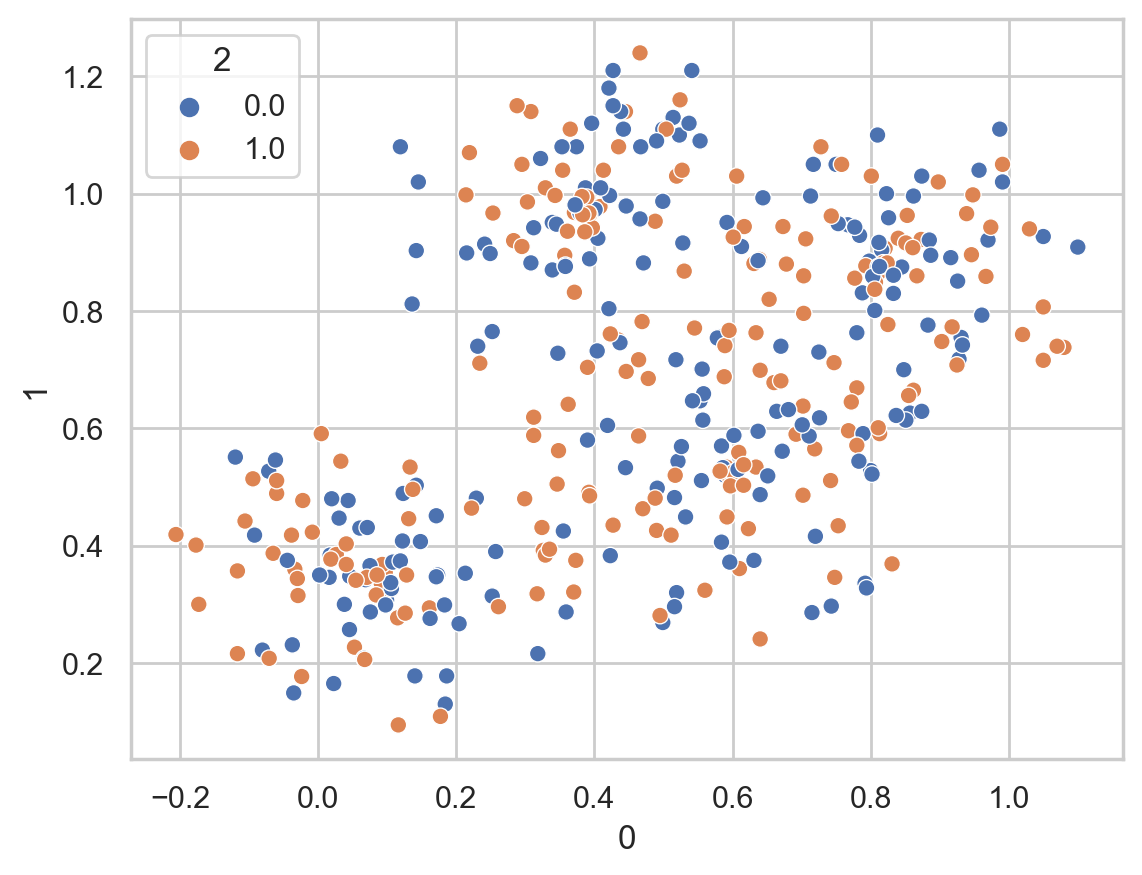

In [36]:
sns.set(style='whitegrid')
sns.scatterplot(x = random_df[0],y = random_df[1] ,hue = random_df[2],data = random_df);

### Train & test Split of the dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test = train_test_split(random_df[[0,1]], random_df[2], test_size = 0.2)

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [41]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [61]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(6,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(5,activation = 'tanh',kernel_initializer = 'he_uniform'))
model.add(Dense(3,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(Dense(2,activation = 'tanh',kernel_initializer = 'he_uniform'))

model.add(Dense(1,activation = 'sigmoid'))

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 8)                 24        
                                                                 
 dense_25 (Dense)            (None, 6)                 54        
                                                                 
 dense_26 (Dense)            (None, 5)                 35        
                                                                 
 dense_27 (Dense)            (None, 3)                 18        
                                                                 
 dense_28 (Dense)            (None, 2)                 8         
                                                                 
 dense_29 (Dense)            (None, 1)                 3         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable 

### Model Compilation and Training 

In [63]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [64]:
history = model.fit(X_trainf,y_train,batch_size=15,epochs=264,validation_split=0.2)

Epoch 1/264


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


18/18 [==============================] - 1s 10ms/step - loss: 0.7061 - accuracy: 0.4805 - val_loss: 0.6912 - val_accuracy: 0.5625
Epoch 2/264
18/18 [==============================] - 0s 3ms/step - loss: 0.7017 - accuracy: 0.4805 - val_loss: 0.6936 - val_accuracy: 0.5781
Epoch 3/264
18/18 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.4688 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 4/264
18/18 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5078 - val_loss: 0.6984 - val_accuracy: 0.4375
Epoch 5/264
18/18 [==============================] - 0s 3ms/step - loss: 0.6969 - accuracy: 0.5195 - val_loss: 0.7003 - val_accuracy: 0.4219
Epoch 6/264
18/18 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.5195 - val_loss: 0.7006 - val_accuracy: 0.4219
Epoch 7/264
18/18 [==============================] - 0s 3ms/step - loss: 0.6946 - accuracy: 0.5117 - val_loss: 0.7021 - val_accuracy: 0.4375
Epoch 8/264
18/18 [=====

### Evaluation of Model

In [46]:
y_pred = model.predict(X_testf) 

3/3 [==============================] - 0s 8ms/step


In [47]:
y_capf = np.where(y_pred>0.5,1,0)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.4875

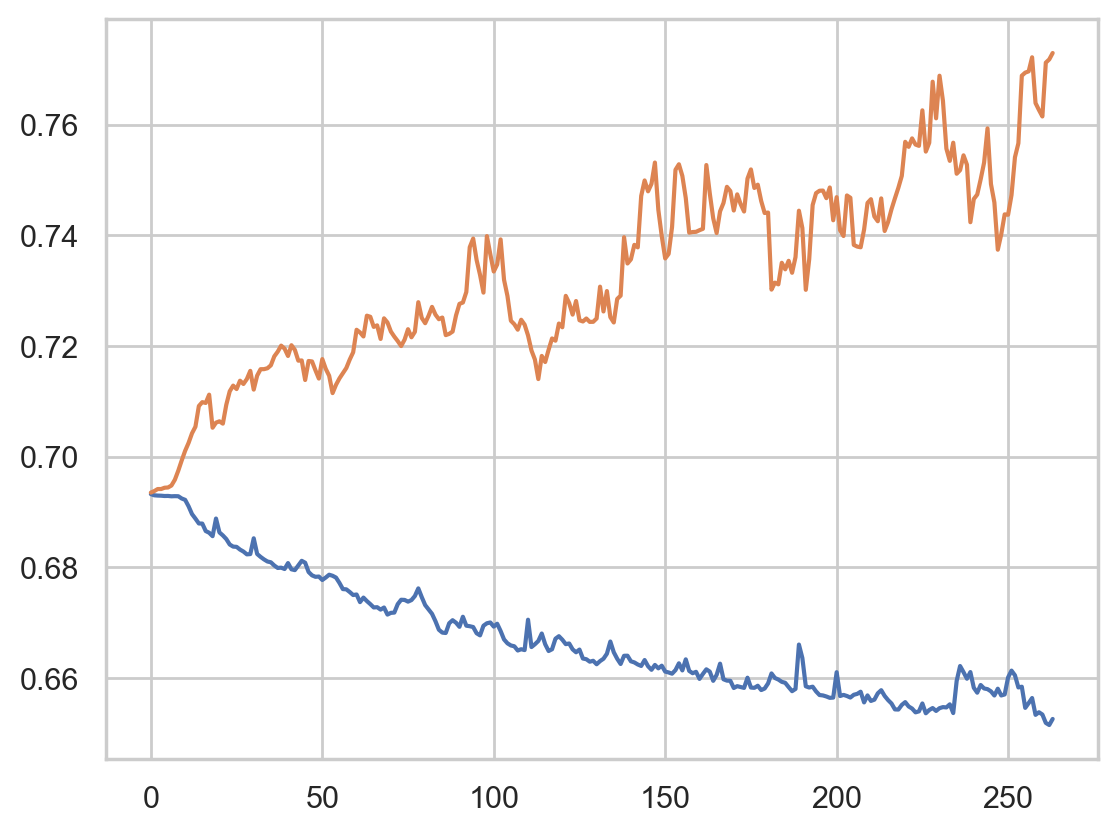

In [49]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [50]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 14s 1ms/step


<AxesSubplot: >

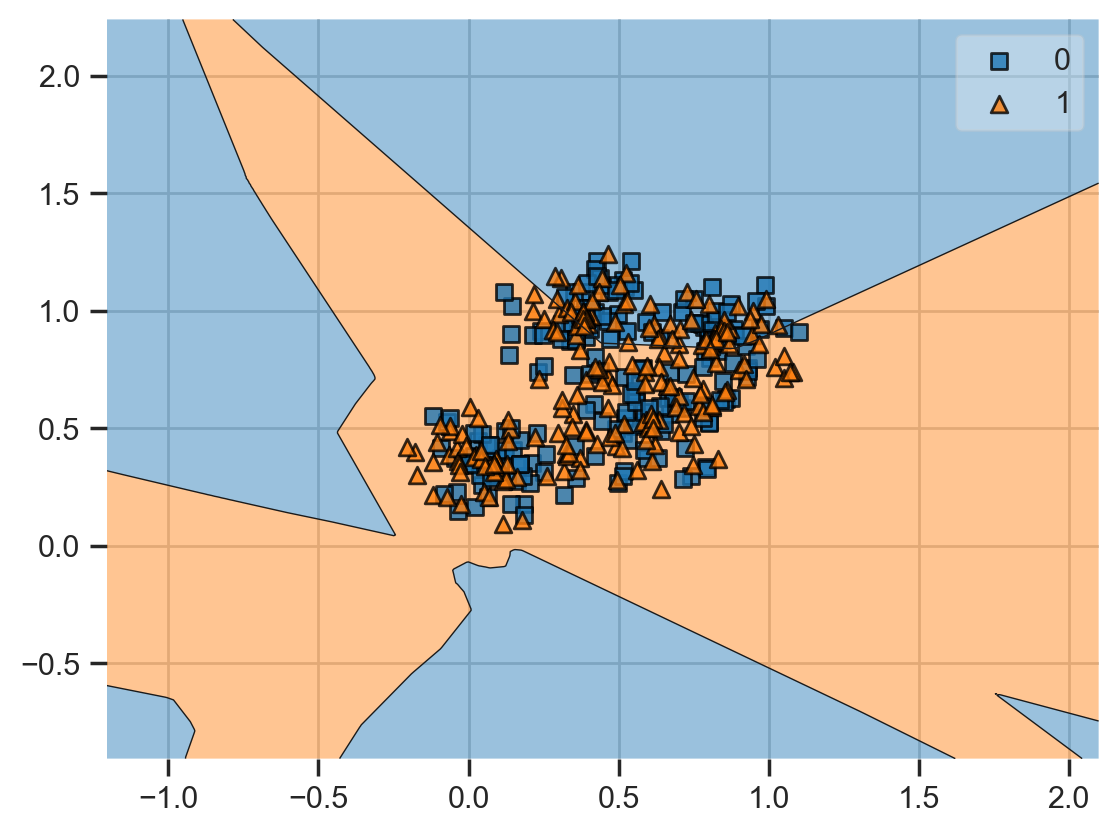

In [51]:
plot_decision_regions(random_df[[0,1]].values, random_df[2].values.astype(int), clf = model)

## 2nd Round

In [52]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'he_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(6,activation = 'tanh'))
model.add(Dense(5,activation = 'relu'))
model.add(Dense(3,activation = 'tanh'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 8)                 24        
                                                                 
 dense_19 (Dense)            (None, 6)                 54        
                                                                 
 dense_20 (Dense)            (None, 5)                 35        
                                                                 
 dense_21 (Dense)            (None, 3)                 18        
                                                                 
 dense_22 (Dense)            (None, 2)                 8         
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 142
Trainable params: 142
Non-trainable 

### Model Compilation and Training 

In [54]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [55]:
history = model.fit(X_trainf,y_train,batch_size=10,epochs=311,validation_split=0.2)

Epoch 1/311


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


26/26 [==============================] - 2s 12ms/step - loss: 0.6948 - accuracy: 0.4805 - val_loss: 0.6926 - val_accuracy: 0.4375
Epoch 2/311
26/26 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5273 - val_loss: 0.6937 - val_accuracy: 0.4531
Epoch 3/311
26/26 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5078 - val_loss: 0.6938 - val_accuracy: 0.4531
Epoch 4/311
26/26 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5352 - val_loss: 0.6950 - val_accuracy: 0.4531
Epoch 5/311
26/26 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5312 - val_loss: 0.6954 - val_accuracy: 0.4688
Epoch 6/311
26/26 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5312 - val_loss: 0.6960 - val_accuracy: 0.4531
Epoch 7/311
26/26 [==============================] - 0s 3ms/step - loss: 0.6920 - accuracy: 0.5312 - val_loss: 0.6962 - val_accuracy: 0.4688
Epoch 8/311
26/26 [=====

### Evaluation of Model

In [56]:
y_pred = model.predict(X_testf) 

3/3 [==============================] - 0s 3ms/step


In [57]:
y_capf = np.where(y_pred>0.5,1,0)

In [58]:
accuracy_score(y_test,y_capf)

0.575

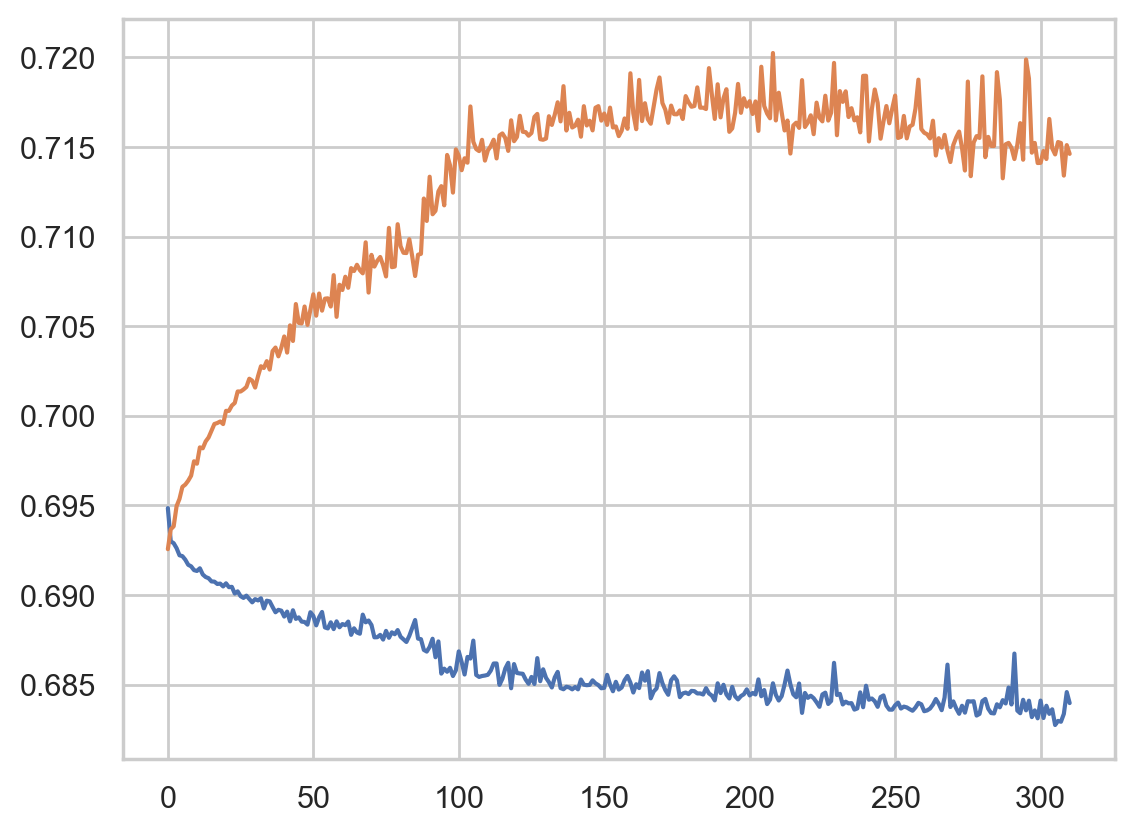

In [59]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 20s 2ms/step


<AxesSubplot: >

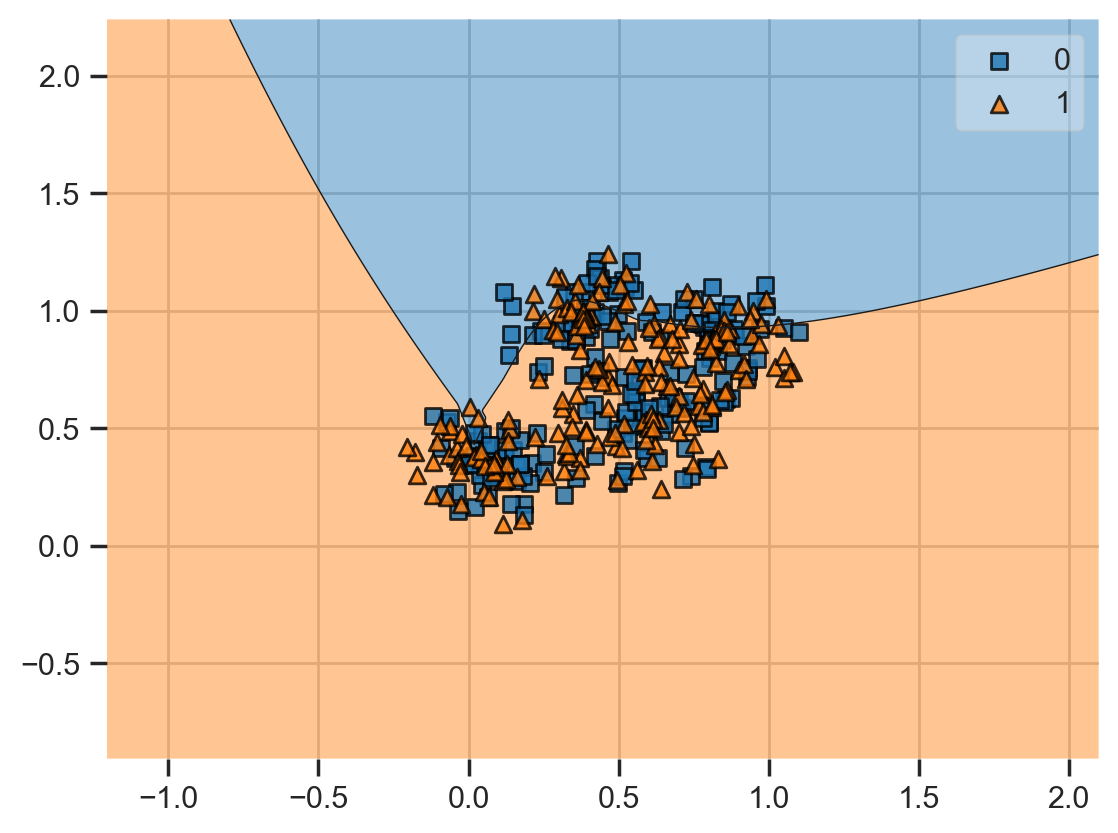

In [60]:
plot_decision_regions(random_df[[0,1]].values, random_df[2].values.astype(int), clf = model)